In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Musliadiii
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier                                                                             
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#MUSLIADII
CRYOmusliadi = pd.read_csv('D:/All Data I Have/Cryotherapy.csv')
CRYOmusliadi.head(10)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
5,1,41,8.00,2,2,20,1
6,1,36,11.00,2,1,8,0
7,1,59,3.50,3,3,20,0
8,1,20,4.50,12,1,6,1
9,2,34,11.25,3,3,150,0


In [3]:
#MUSLIADI
CRYOmusliadi.shape

(90, 7)

In [4]:
#MUSLIADI
CRYOmusliadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.1 KB


In [5]:
#MUSLIADI
CRYOmusliadi.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [6]:
#MUSLIADI
CRYOmusliadi.duplicated().sum()

1

In [7]:
#MUSLIADI
duplikat = CRYOmusliadi[CRYOmusliadi.duplicated(keep=False)]
print(duplikat)

    sex  age  Time  Number_of_Warts  Type  Area  Result_of_Treatment
25    2   34  12.0                3     3    95                    0
85    2   34  12.0                3     3    95                    0


In [8]:
#MUSLIADI
CRYOmusliadii = CRYOmusliadi.drop(85)

In [9]:
#MUSLIADI
CRYOmusliadii.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1.471910,28.539326,7.617978,5.539326,1.685393,85.730337,0.539326
std,0.502039,13.424076,3.394324,3.577252,0.899438,132.475878,0.501275
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.500000,2.000000,1.000000,20.000000,0.000000
50%,1.000000,24.000000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.500000,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


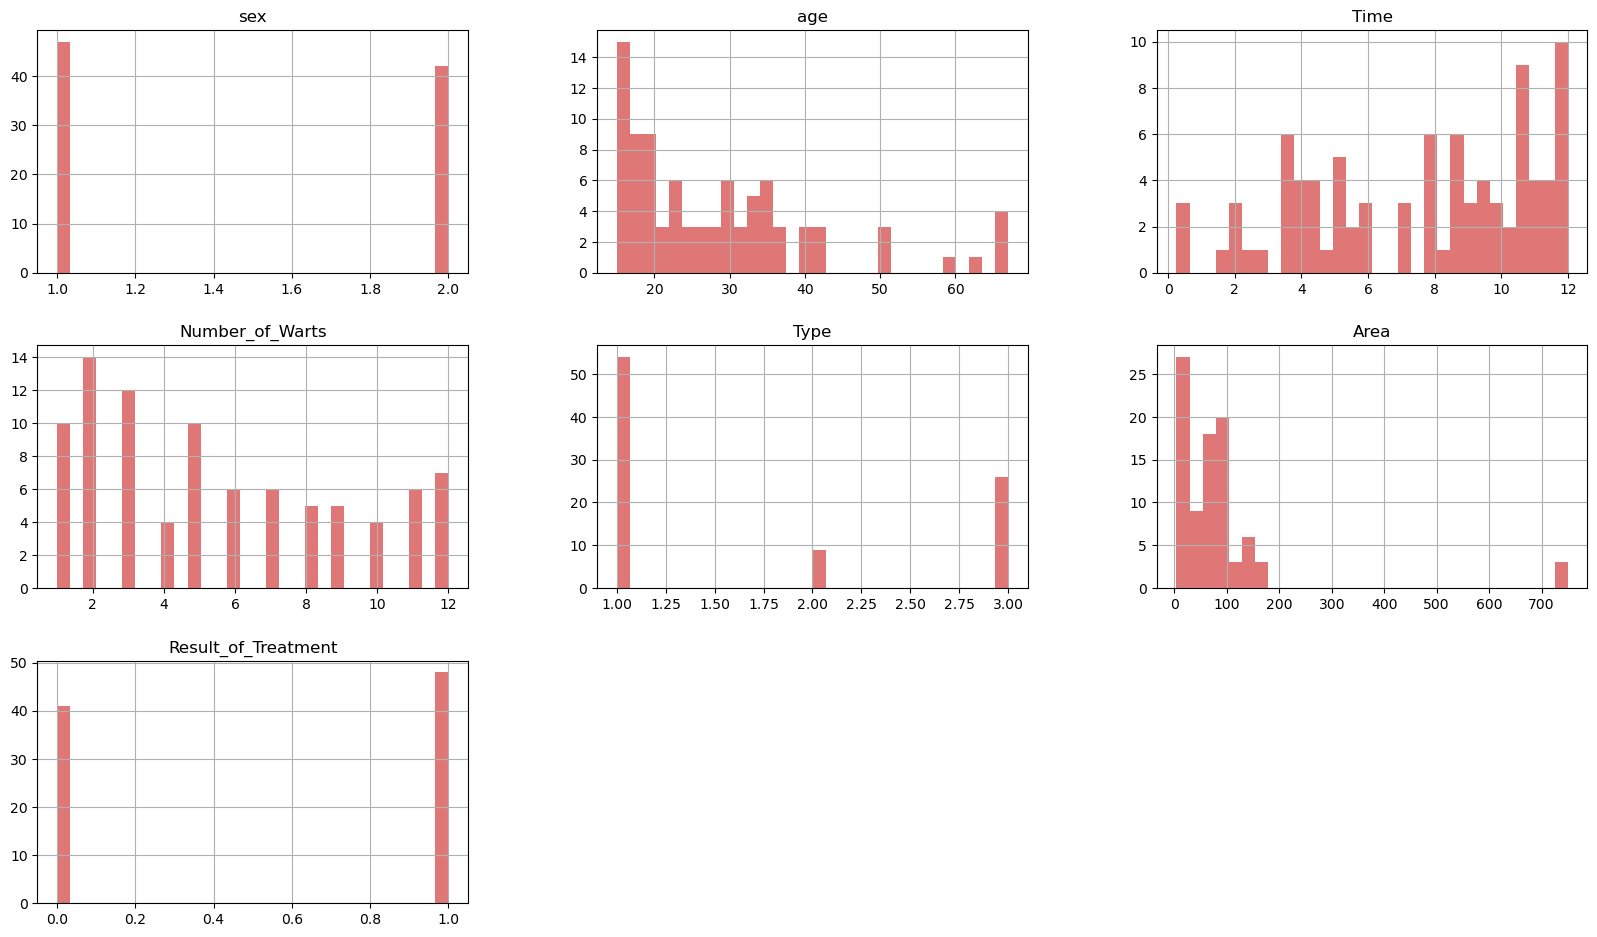

In [10]:
#Musliadi
CRYOmusliadii.hist(bins=30, figsize=(20,40), layout=(10,3), color='#e07777');

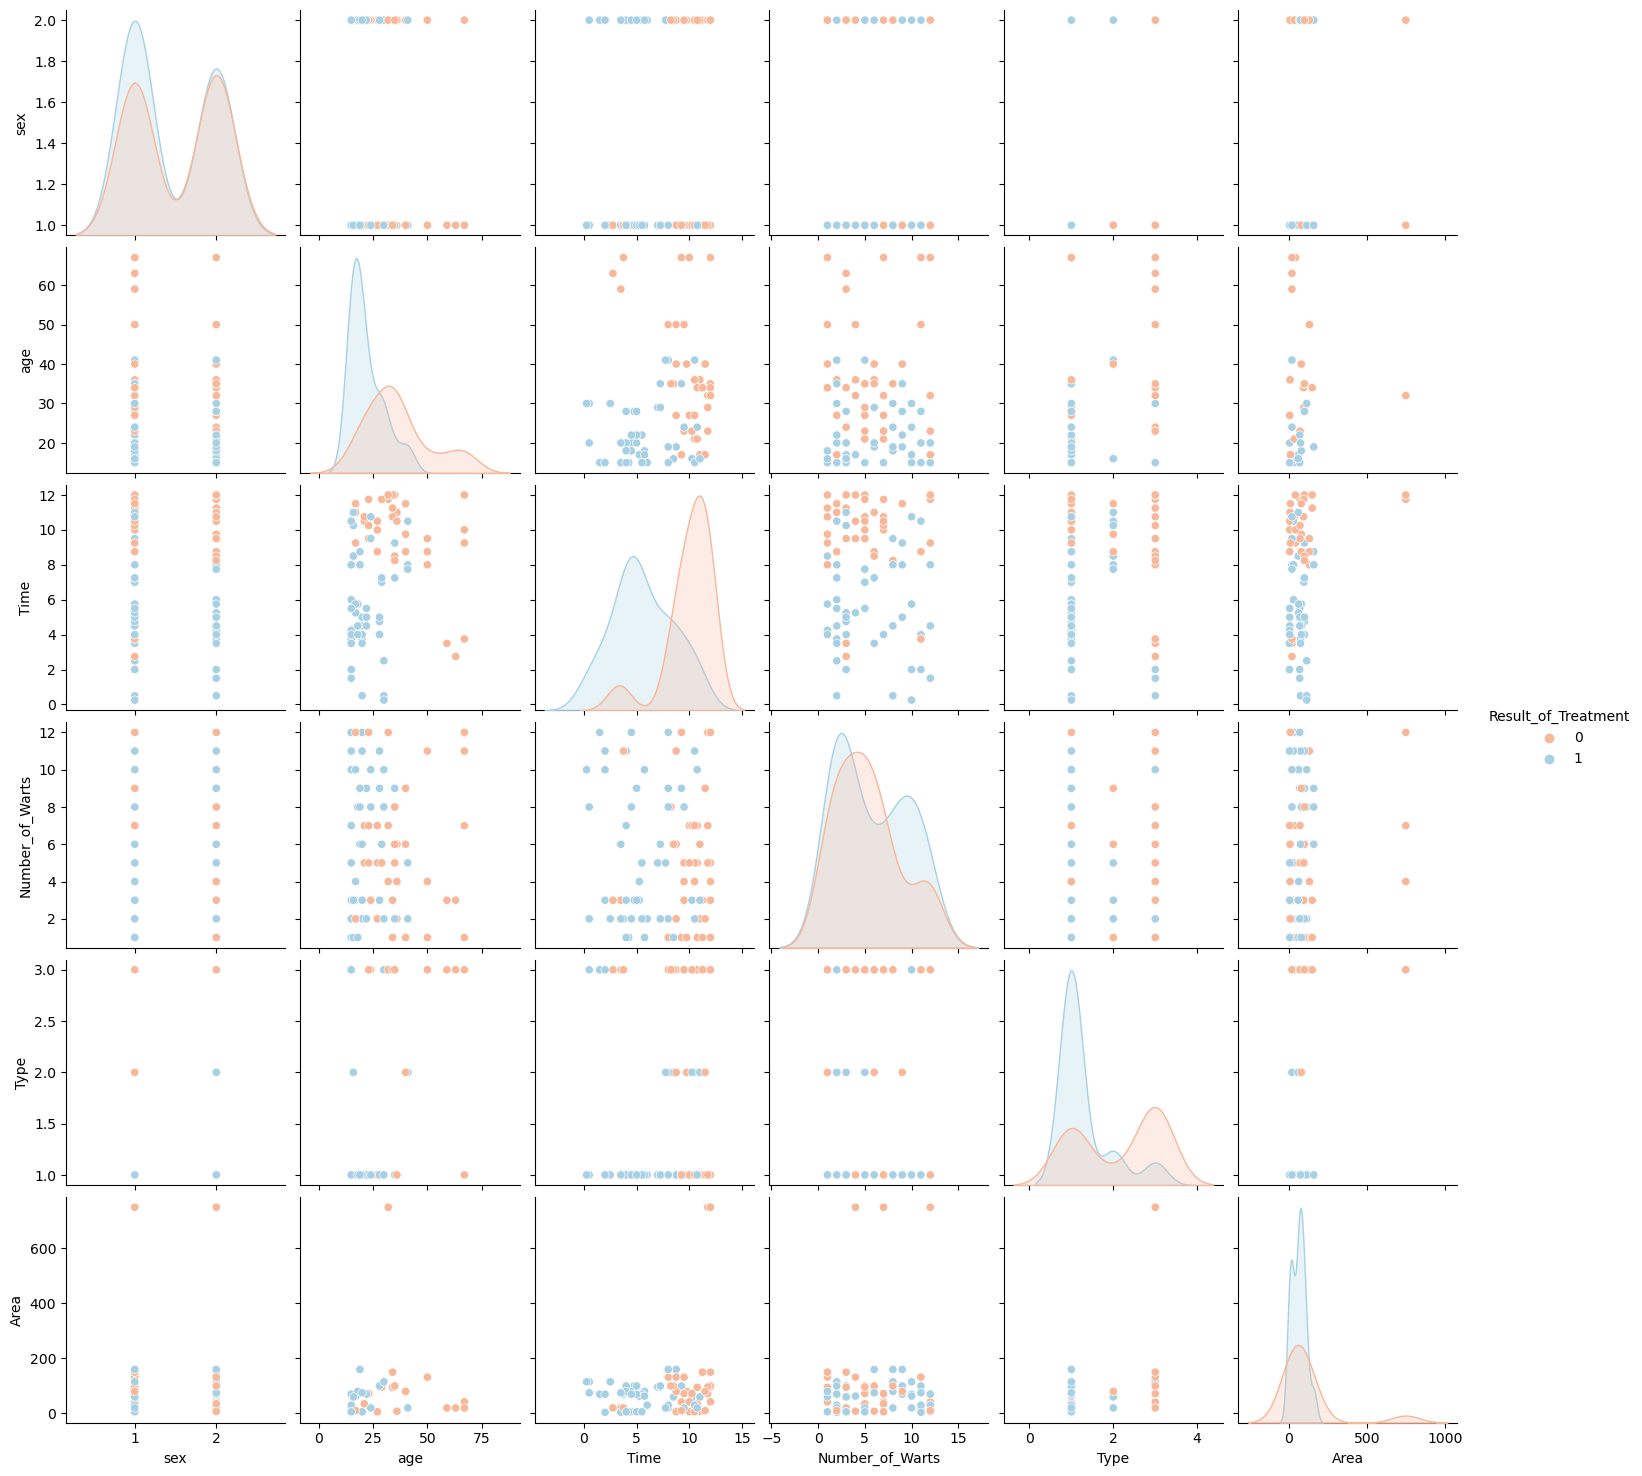

In [11]:
#MUSLIADII
sns.pairplot(CRYOmusliadii, hue='Result_of_Treatment', palette='RdBu' )

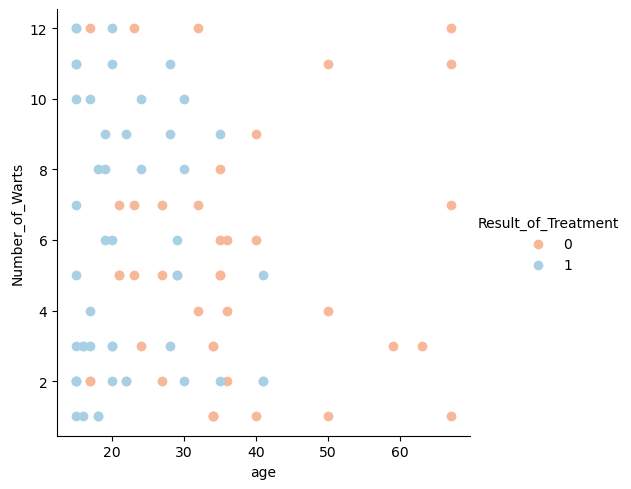

In [12]:
#MUSLIADII
sns.FacetGrid(CRYOmusliadii,hue="Result_of_Treatment", height=5, palette='RdBu')\
  .map(plt.scatter, "age","Number_of_Warts")\
  .add_legend()

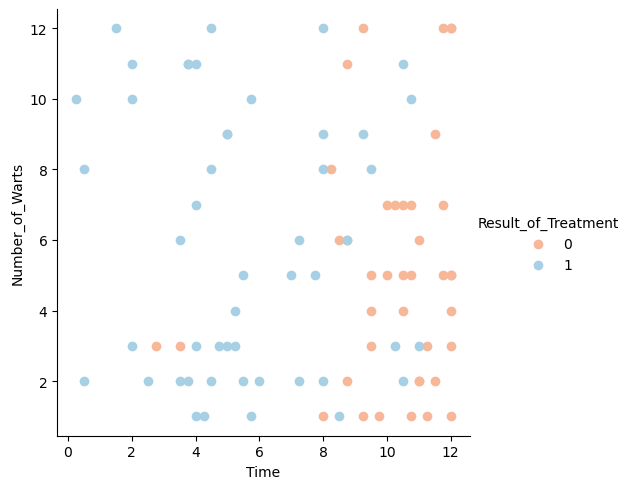

In [13]:
#MUSLIADII
sns.FacetGrid(CRYOmusliadii,hue="Result_of_Treatment", height=5, palette='RdBu')\
  .map(plt.scatter, "Time","Number_of_Warts")\
  .add_legend()

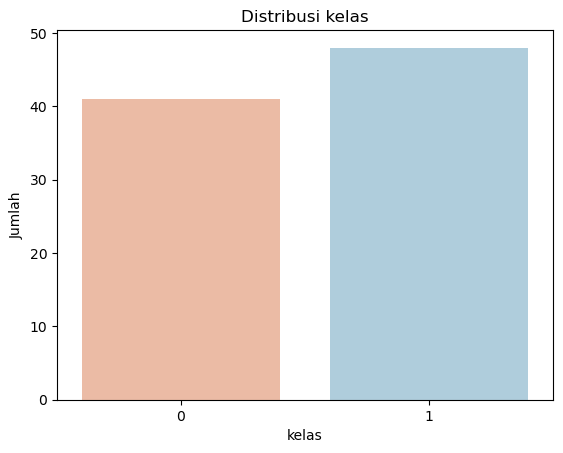

1    0.539326
0    0.460674
Name: Result_of_Treatment, dtype: float64


In [14]:
#MUSLIADII
class_distribution = CRYOmusliadii['Result_of_Treatment'].value_counts()

sns.countplot(data=CRYOmusliadii, x='Result_of_Treatment', palette='RdBu')
plt.title('Distribusi kelas')
plt.xlabel('kelas')
plt.ylabel('Jumlah')
plt.show()

class_proportions = CRYOmusliadii['Result_of_Treatment'].value_counts(normalize=True)
print(class_proportions)

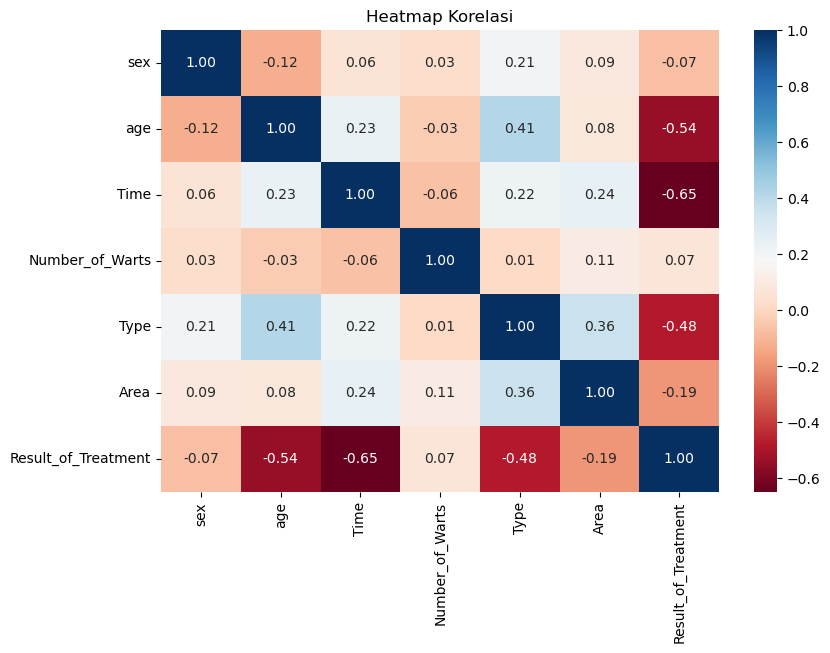

In [15]:
#MUSLIADI
correlations = CRYOmusliadii.corr(method='pearson')
plt.figure(figsize=(9, 6))
sns.heatmap(correlations, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [16]:
#Musliadi
X = CRYOmusliadii.iloc[:, :-1].values
y = CRYOmusliadii.iloc[:, 6].values

In [17]:
#musliadi
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.1,shuffle=True, stratify=y, random_state=42)

In [18]:
#MUSLIADI
print("Jumlah baris X_train:", len(X_train))
print("Jumlah baris X_test:", len(X_test))
print("Jumlah baris y_train:", len(y_train))
print("Jumlah baris y_test:", len(y_test))

Jumlah baris X_train: 80
Jumlah baris X_test: 9
Jumlah baris y_train: 80
Jumlah baris y_test: 9


In [19]:
#MUS
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_predGNB = classifier.predict(X_test)
print(y_predGNB)

[1 1 0 1 1 0 1 1 1]


In [20]:
#MUSS
#Gaussian
print(confusion_matrix(y_test, y_predGNB))

[[1 3]
 [1 4]]


In [21]:
#MUSS
print(classification_report(y_test, y_predGNB))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9



In [22]:
#MUSS
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_predMNB = classifier.predict(X_test)
print(y_predMNB)

[1 0 1 1 0 1 1 1 1]


In [23]:
#MUSS
#Multinomial
print(confusion_matrix(y_test, y_predMNB))

[[1 3]
 [1 4]]


In [24]:
#MUSS
print(classification_report(y_test, y_predMNB))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9



In [25]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_predBNB = classifier.predict(X_test)
print(y_predBNB)#MUS

[1 1 1 1 1 1 1 1 1]


In [26]:
#MUSS
#Bernoulli
print(confusion_matrix(y_test, y_predBNB))

[[0 4]
 [0 5]]


In [27]:
#MUSS
print(classification_report(y_test, y_predBNB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



C:\Users\A S U S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A S U S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A S U S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#MUSS
from sklearn.metrics import accuracy_score, log_loss
classifiers=[
    MultinomialNB(),
    BernoulliNB(),
]

#Logging for visual comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log=pd.DataFrame(columns=log_cols)

for clf in classifiers:
  clf.fit(X_train, y_train)
  name= clf.__class__.__name__

  print("="*30)
  print(name)

  print('****Results****')
  train_predictions = clf.predict(X_test)
  acc=accuracy_score(y_test, train_predictions)
  print("Accuracy: {:.4%}".format(acc))

  log_entry=pd.DataFrame([[name, acc*100,11]], columns=log_cols)
  log= log.append(log_entry)

  print("="*30)

MultinomialNB
****Results****
Accuracy: 55.5556%
BernoulliNB
****Results****
Accuracy: 55.5556%


C:\Users\A S U S\AppData\Local\Temp\ipykernel_14672\2255088272.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log= log.append(log_entry)
C:\Users\A S U S\AppData\Local\Temp\ipykernel_14672\2255088272.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log= log.append(log_entry)


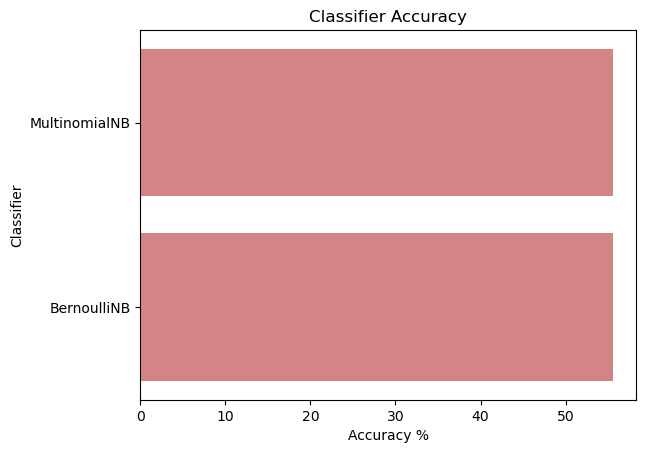

In [29]:
#MUSS
sns.set_color_codes("muted")
sns.barplot(x='Accuracy',y='Classifier', data=log, color="#e07777")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()